In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import re
import pandas as pd

for j, name in enumerate(train_data['Name']):
    if re.search(r'Mr\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 32.368090452261306
    elif re.search(r'Mrs\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 35.898148148148145
    elif re.search(r'Dr\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 42
    elif re.search(r'Master\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 4.574166666666667
    elif re.search(r'Miss\.', str(name)) and pd.isna(train_data.loc[j, 'Age']):
        train_data.loc[j, 'Age'] = 21.773972602739725


In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
if train_data['Embarked'].isna().any():
    train_data['Embarked'].fillna('mean',inplace=True)


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
train_data=train_data.drop(['Cabin','SibSp'],axis=1)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754659,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.277179,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.773973,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.898148,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754659,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.277179,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.773973,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.898148,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [15]:
train_data=train_data.drop(['Ticket','Name'],axis=1)

In [16]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data['Sex']= label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked']= label_encoder.fit_transform(train_data['Embarked'])

In [18]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,1,22.000000,0,7.2500,2
1,2,1,1,0,38.000000,0,71.2833,0
2,3,1,3,0,26.000000,0,7.9250,2
3,4,1,1,0,35.000000,0,53.1000,2
4,5,0,3,1,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,13.0000,2
887,888,1,1,0,19.000000,0,30.0000,2
888,889,0,3,0,21.773973,2,23.4500,2
889,890,1,1,1,26.000000,0,30.0000,0


<Axes: >

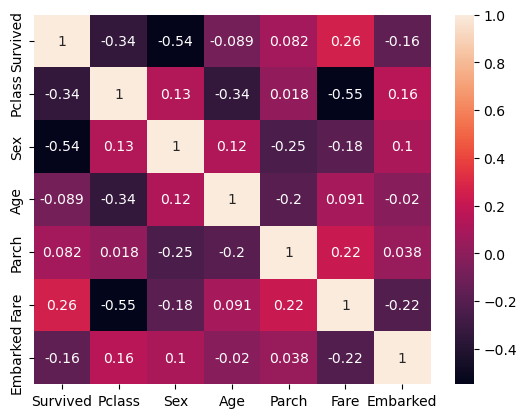

In [19]:
import seaborn as sns
sns.heatmap(train_data.drop('PassengerId',axis=1).corr(),annot=True)


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [21]:
x=train_data.drop(['Survived'],axis=1)
y=train_data.Survived

In [22]:
x

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,3,1,22.000000,0,7.2500,2
1,2,1,0,38.000000,0,71.2833,0
2,3,3,0,26.000000,0,7.9250,2
3,4,1,0,35.000000,0,53.1000,2
4,5,3,1,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,13.0000,2
887,888,1,0,19.000000,0,30.0000,2
888,889,3,0,21.773973,2,23.4500,2
889,890,1,1,26.000000,0,30.0000,0


In [23]:
test_data= pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
import re
import pandas as pd

for j, name in enumerate(test_data['Name']):
    if re.search(r'Mr\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 32.368090452261306
    elif re.search(r'Mrs\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 35.898148148148145
    elif re.search(r'Dr\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 42
    elif re.search(r'Master\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 4.574166666666667
    elif re.search(r'Miss\.', str(name)) or re.search(r'Ms\.', str(name)) and pd.isna(test_data.loc[j, 'Age']):
        test_data.loc[j, 'Age'] = 21.773972602739725


In [26]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
test_data[test_data['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [30]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
test_data=test_data.drop(['Name','SibSp','Cabin','Ticket'],axis=1)

In [32]:
test_data

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,male,34.500000,0,7.8292,Q
1,893,3,female,47.000000,0,7.0000,S
2,894,2,male,62.000000,0,9.6875,Q
3,895,3,male,27.000000,0,8.6625,S
4,896,3,female,22.000000,1,12.2875,S
...,...,...,...,...,...,...,...
413,1305,3,male,32.368090,0,8.0500,S
414,1306,1,female,39.000000,0,108.9000,C
415,1307,3,male,38.500000,0,7.2500,S
416,1308,3,male,32.368090,0,8.0500,S


In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_data['Sex']= label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked']= label_encoder.fit_transform(test_data['Embarked'])

In [34]:
test_data

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked
0,892,3,1,34.500000,0,7.8292,1
1,893,3,0,47.000000,0,7.0000,2
2,894,2,1,62.000000,0,9.6875,1
3,895,3,1,27.000000,0,8.6625,2
4,896,3,0,22.000000,1,12.2875,2
...,...,...,...,...,...,...,...
413,1305,3,1,32.368090,0,8.0500,2
414,1306,1,0,39.000000,0,108.9000,0
415,1307,3,1,38.500000,0,7.2500,2
416,1308,3,1,32.368090,0,8.0500,2


In [35]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
test_data=test_data.drop('Parch',axis=1)

In [37]:
x=train_data.drop(['Survived','Parch'],axis=1)
y=train_data.Survived

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {'learning_rate': 0.10184977839317343, 'max_depth': 5, 'n_estimators': 149}
clf = GradientBoostingClassifier(**best_params)

clf.fit(x, y)

GradientBoostingClassifier(learning_rate=0.10184977839317343, max_depth=5,
                           n_estimators=149)

In [39]:
test_data

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.500000,7.8292,1
1,893,3,0,47.000000,7.0000,2
2,894,2,1,62.000000,9.6875,1
3,895,3,1,27.000000,8.6625,2
4,896,3,0,22.000000,12.2875,2
...,...,...,...,...,...,...
413,1305,3,1,32.368090,8.0500,2
414,1306,1,0,39.000000,108.9000,0
415,1307,3,1,38.500000,7.2500,2
416,1308,3,1,32.368090,8.0500,2


In [40]:
resultt=clf.predict(test_data)

In [41]:
resultt

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': resultt})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
